In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
# Load the tf_flowers dataset
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


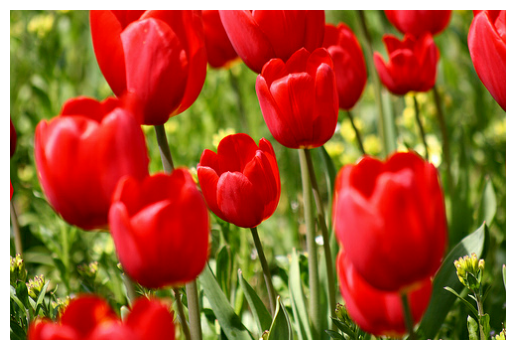

In [12]:
# Define a function to visualize images
def display_image(image):
    """Displays an image using matplotlib.pyplot."""
    _ = plt.imshow(image)
    plt.axis('off')
    plt.show()

# Preview a single image and label
image, label = next(iter(train_ds))
display_image(image)

In [13]:
# Function to visualize original vs augmented image
def visualize(original, augmented):
    fig = plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis('off')
    plt.show()


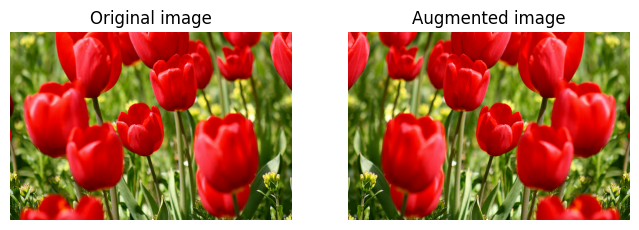

In [14]:
# Apply basic augmentations
# Flip image horizontally
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

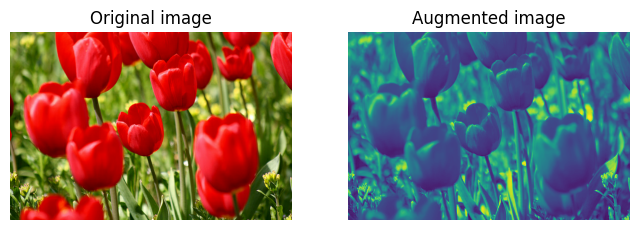

In [15]:
# Convert to grayscale and visualize
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image, tf.squeeze(grayscaled))

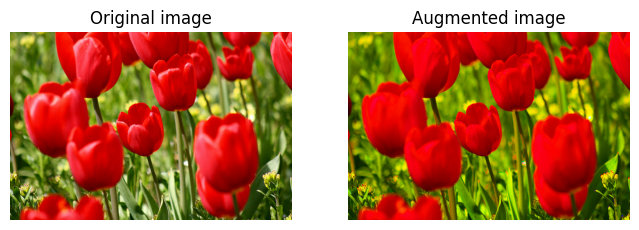

In [16]:
# Adjust saturation
saturated = tf.image.adjust_saturation(image, 10)
visualize(image, saturated)

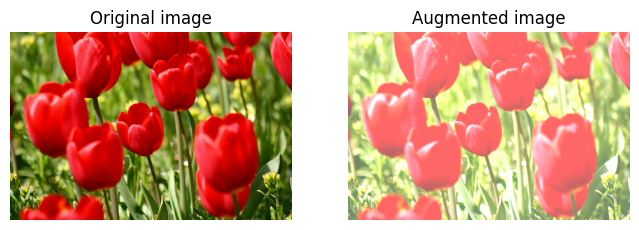

In [17]:
# Adjust brightness
bright = tf.image.adjust_brightness(image, 0.4)
visualize(image, bright)

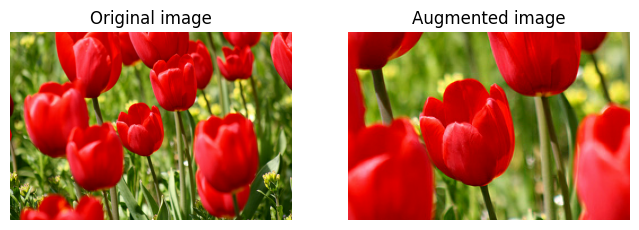

In [18]:
# Crop image to 50% of the central region
cropped = tf.image.central_crop(image, central_fraction=0.5)
visualize(image, cropped)

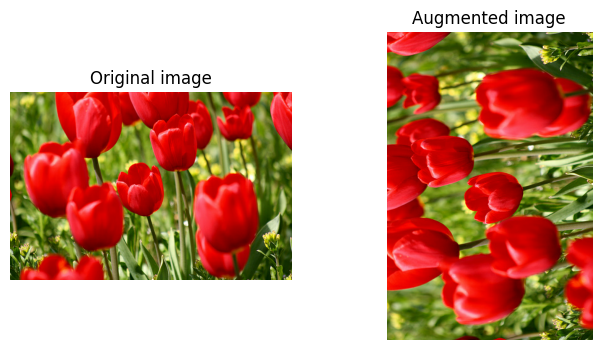

In [19]:
# Rotate 90 degrees counterclockwise
rotated = tf.image.rot90(image)
visualize(image, rotated)

In [20]:
# Use ImageDataGenerator for more augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [21]:
# Convert the image to a batch of size 1
image_batch = np.expand_dims(image.numpy(), axis=0)

In [22]:
# Generate augmented images
augmented_images = datagen.flow(image_batch)

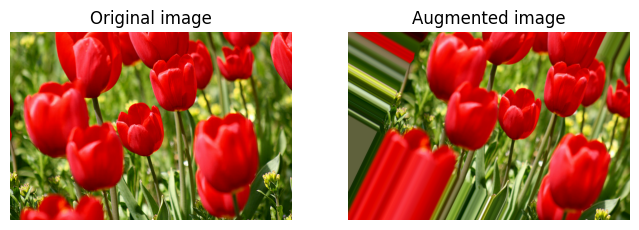

In [23]:
# Visualize one augmented image
augmented_image = next(augmented_images)[0].astype('uint8')
visualize(image, augmented_image)